In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Othercomputers/jd-tan/vizwiz-vlm-drive

Mounted at /content/drive
/content/drive/Othercomputers/jd-tan/vizwiz-vlm-drive


UsageError: Line magic function `%autoreload` not found.


In [4]:
%load_ext autoreload
%autoreload

Exploring the VizWiz dataset.

In [6]:
%ls data/

annotations/  train/


In [26]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from pathlib import Path
import seaborn as sns

data_dir = Path("./data")
train_ann = data_dir / "annotations/train.json"
val_ann = data_dir / "annotations/val.json"

In [9]:
with open(train_ann, 'r') as f:
  train_data = json.load(f)
  print(f"Number of training samples: {len(train_data)}")
  print("Sample annotation:")
  print(json.dumps(train_data[0], indent=2))

Number of training samples: 20523
Sample annotation:
{
  "image": "VizWiz_train_00000000.jpg",
  "question": "What's the name of this product?",
  "answers": [
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil leaves"
    },
    {
      "answer_confidence": "yes",
      "answer": "basil"
    }
  ],
  "answer_type": "other",
  "answerable": 1
}


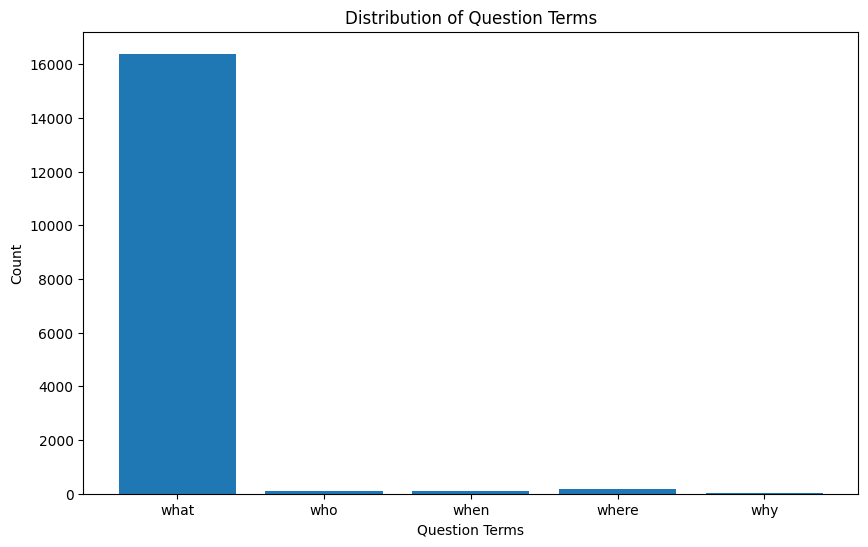

In [28]:
question_terms = ["who", "when", "where", "why", "what"]
question_counts = defaultdict(int)
for item in train_data:
  question = item["question"].lower()
  words = re.split(" |'s ", question)
  for term in question_terms:
    if term in words:
      question_counts[term] += 1
      break

plt.figure(figsize=(10, 6))
plt.bar(list(question_counts.keys()), list(question_counts.values()))
plt.xlabel('Question Terms')
plt.ylabel('Count')
plt.title('Distribution of Question Terms')
plt.show()

In [29]:
fig, axes = plt.subplots(2, 5, figsize=(25, 20))
axes = axes.flatten()

for i in range(10):
  sample = train_data[i]
  img_path = data_dir / 'train/sample' / sample['image']
  img = Image.open(img_path)
  axes[i].imshow(img)
  axes[i].set_title(f"Q: {sample['question']}", wrap=True)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.